In [77]:
# =====================================
# Crop Yield Prediction Project
# =====================================

# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [78]:
# Load Dataset
data = pd.read_csv("crop_yield.csv")

# View first few rows
data.head()


,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [79]:
# Dataset Inspection
data.columns


Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [80]:
# Remove unnecessary column if present
if 'Unnamed: 0' in data.columns:
    data.drop(columns=['Unnamed: 0'], inplace=True)

data.columns


Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [81]:
# Check data types
data.dtypes


,0
Area,object
Item,object
Year,int64
hg/ha_yield,int64
average_rain_fall_mm_per_year,float64
pesticides_tonnes,float64
avg_temp,float64


In [82]:
# Check missing values
data.isnull().sum()


,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


In [83]:
# Handle missing values
data.dropna(inplace=True)


In [84]:
# Encode Categorical Columns
le = LabelEncoder()

data['Area'] = le.fit_transform(data['Area'])
data['Item'] = le.fit_transform(data['Item'])

data.head()


,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,1,1990,36613,1485.0,121.0,16.37
1,0,3,1990,66667,1485.0,121.0,16.37
2,0,4,1990,23333,1485.0,121.0,16.37
3,0,5,1990,12500,1485.0,121.0,16.37
4,0,6,1990,7000,1485.0,121.0,16.37


In [85]:
# Feature Selection
X = data[
    ['Area',
     'Item',
     'Year',
     'average_rain_fall_mm_per_year',
     'pesticides_tonnes',
     'avg_temp']
]

y = data['hg/ha_yield']

X.shape, y.shape


((28242, 6), (28242,))

In [86]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

X_train.shape, X_test.shape


((22593, 6), (5649, 6))

In [87]:
# Baseline Model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_pred = lr_model.predict(X_test)
lr_pred[:5]


array([95206.02035279, 43756.97675549, 90710.57817012, 89829.8359874 ,
       55634.71902269])

In [88]:
# Evaluate Linear Regression
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print("Linear Regression MAE :", lr_mae)
print("Linear Regression RMSE:", lr_rmse)
print("Linear Regression R2  :", lr_r2)


Linear Regression MAE : 62444.31062975515
Linear Regression RMSE: 81501.76446544638
Linear Regression R2  : 0.08425172276039494


In [89]:
# Improved Model: Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)


In [90]:
# Evaluate Random Forest
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest MAE :", rf_mae)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2  :", rf_r2)


Random Forest MAE : 3752.47717472119
Random Forest RMSE: 10181.762058896022
Random Forest R2  : 0.9857081655966298


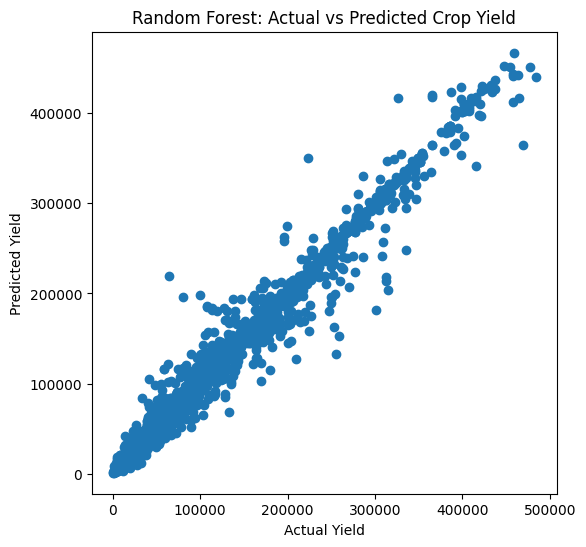

In [91]:
# Visualization (Random Forest)
plt.figure(figsize=(6, 6))
plt.scatter(y_test, rf_pred)
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Random Forest: Actual vs Predicted Crop Yield")
plt.show()


In [92]:
# Single Prediction (Inference Example)
sample_input = [[
    X.iloc[0]['Area'],
    X.iloc[0]['Item'],
    2023,
    1200,
    3.5,
    27
]]

prediction = rf_model.predict(sample_input)
print("Predicted Crop Yield:", prediction[0])


Predicted Crop Yield: 35346.97


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



# **Completed ✌**


---



